# **Week 4**

## Continuing on Statistics: **Confidence Intervals**





### In the following exercise we are going to learn how to find a confidence interval for the parameter estimations we learned in the past few weeks:  

Let's look at the following Normal distrubution:


$$
\begin{equation*}
N(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation*}
$$

In [4]:
def Gaussian(x, mu=0, sigma=1):
    from math import sqrt, pi, exp
    return (1/sqrt(2*pi*sigma**2)*exp(-(x-mu)**2/(2*sigma**2)))

We can generate a random number from this ditributions using `random` package:

In [6]:
import random 
import numpy as np

In [7]:
mu = 10
sigma = 3
number_of_points = int(10e5)

our_pool = np.array([random.gauss(mu, sigma) for _ in range(number_of_points)])

Now that we generated $10^5$ points from the $N(x; \mu=10, \sigma=3)$, let's take a look at their histogram to see whether we are getting close to the Normal distribution. But first let's import and setup the configuration of our plots as follows:

In [8]:
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Now that we have all the needed packages, let's plot:

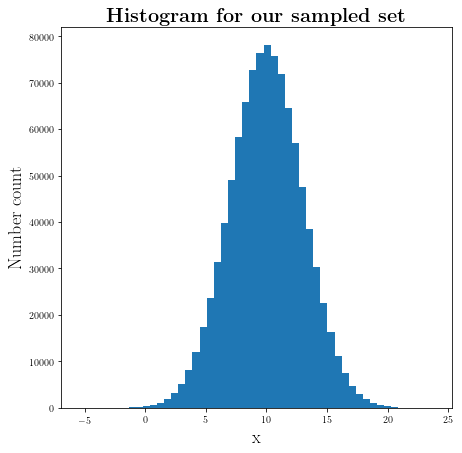

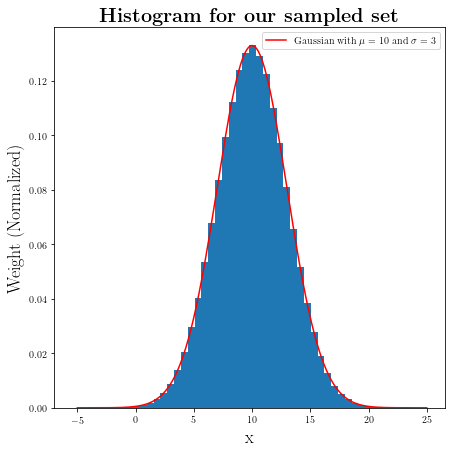

In [9]:
plt.subplots(1,1, figsize=(7,7))
plt.hist(our_pool, histtype="bar", bins=50)

plt.title(r"\textbf{Histogram for our sampled set}", fontsize=20)

plt.ylabel(r"Number count", fontsize=18)
plt.xlabel(r"x", fontsize=18)

###
x_span = np.linspace(-5,25, 10000)
y_gaussian = [Gaussian(x, mu, sigma) for x in x_span]


plt.subplots(1,1, figsize=(7,7))
a = plt.hist(our_pool, histtype="bar", density=True, bins=50)


plt.plot(x_span, y_gaussian, 'r', label=r"Gaussian with $\mu={}$ and $\sigma={}$".format(mu, sigma))


plt.title(r"\textbf{Histogram for our sampled set}", fontsize=20)

plt.ylabel(r"Weight (Normalized)", fontsize=18)
plt.xlabel(r"x", fontsize=18)

plt.legend(fontsize=10)

plt.show()


Which as you can see is fairly close to the Normal distribution. 

### How many of these points fall inside $[\mu-\sigma, \mu+\sigma]$?

In [10]:
points_inside = our_pool[our_pool<=mu+sigma]
points_inside = points_inside[points_inside>=mu-sigma]

In [11]:
print(r"Fraction of points inside [μ-σ, μ+σ] is:", len(points_inside)/number_of_points)

Fraction of points inside [μ-σ, μ+σ] is: 0.681943


### What about $[\mu-2\sigma, \mu+2\sigma]$?

In [12]:
points_inside = our_pool[our_pool<=mu+2*sigma]
points_inside = points_inside[points_inside>=mu-2*sigma]

In [13]:
print(r"Fraction of points inside [μ-2σ, μ+2σ] is:", len(points_inside)/number_of_points)

Fraction of points inside [μ-2σ, μ+2σ] is: 0.954603


As we saw in the examples above about 68% of the points sampled from a gaussian distributions fall within 1 $\sigma$ of the mean ($\mu$) and about 95% fall within the $2\sigma$.

### Let's use another useful library: [scipy]() 

In [491]:
import scipy.integrate as integral

In [485]:
def find_confidence(number_of_trials=1, list_of_deviations=[1, 2, 3]):
    for i in range(number_of_trials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
   
        print("μ =", mu, "σ =", sigma, "\n")
        
        for j in list_of_deviations:
            _integral_, _integral_err = integral.quad(Gaussian, mu-j*sigma, 
                                                      mu+j*sigma, (mu, sigma))
            print("Fraction of points within {} σ is :".format(j), round(_integral_,7))
            print("Error in our estimation: ", _integral_err)
            print("\n")

In [486]:
find_confidence()

μ = 10 σ = 7 

Fraction of points within 1 σ is : 0.6826895
Error in our estimation:  7.579375928402476e-15


Fraction of points within 2 σ is : 0.9544997
Error in our estimation:  1.8403572258862486e-11


Fraction of points within 3 σ is : 0.9973002
Error in our estimation:  1.1072256503105314e-14




In [487]:
find_confidence(2,[1,2,3,4,5])

μ = -10 σ = 7 

Fraction of points within 1 σ is : 0.6826895
Error in our estimation:  7.579375928402476e-15


Fraction of points within 2 σ is : 0.9544997
Error in our estimation:  1.8403572258862486e-11


Fraction of points within 3 σ is : 0.9973002
Error in our estimation:  1.1072256503105314e-14


Fraction of points within 4 σ is : 0.9999367
Error in our estimation:  4.8388942592431095e-12


Fraction of points within 5 σ is : 0.9999994
Error in our estimation:  8.668320644611427e-10


μ = 0 σ = 6 

Fraction of points within 1 σ is : 0.6826895
Error in our estimation:  7.579375928402476e-15


Fraction of points within 2 σ is : 0.9544997
Error in our estimation:  1.840354865397235e-11


Fraction of points within 3 σ is : 0.9973002
Error in our estimation:  1.1072256503105314e-14


Fraction of points within 4 σ is : 0.9999367
Error in our estimation:  4.838904125482879e-12


Fraction of points within 5 σ is : 0.9999994
Error in our estimation:  8.668319950722037e-10




### *Additional*

#### Let's find the [Cumulative distribution function (cdf)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) for a given pdf:

This is a uniform pdf:

In [200]:
def pdf(x, x_range=[-1,1]):
    x_0 = min(x_range)
    x_1 = max(x_range)
    
    if x>=x_0 and  x < x_1:
        return 1/(x_1-x_0)
    else:
        return 0

In [201]:
span_X = np.linspace(-3,3,1000)
span_Y = np.array([pdf(x) for x in span_X])

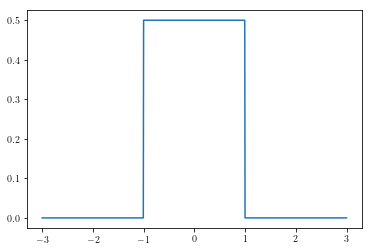

In [202]:
plt.plot(span_X, span_Y)
plt.show()

In the following we first define a function that takes integral: (not optimized much better to use buit-in funcrions)

In [212]:
def integrate(f, x0, x1, num=10**4):
    _range_ = np.linspace(x0, x1, num)
    _fun_val = np.array([f(x) for x in _range_])
    _sum_ = 0
    for i in range(num-1):
        y1 = _fun_val[i]
        y2 = _fun_val[i+1]
        
        y = (y1 + y2)/2
        _sum_+=y*((x1-x0)/num)
    return _sum_


def cdf_finder(f, x_range):
    def cdf(x):
        return integrate(f, min(x_range), x)
    return cdf

In [214]:
my_cdf = cdf_finder(pdf, [-3,3])

In [217]:
# Can take a while depend on your machine
y=[my_cdf(x) for x in np.linspace(-2,2, 100)] 

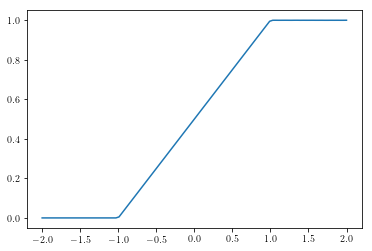

In [219]:
plt.plot(np.linspace(-2,2, 100), y)

In [492]:
def find_x(pdf, _y_, _range_):
    from scipy import optimize    
    def f(x):
        return pdf(x)-_y_
    f = np.vectorize(f)
    x_range = optimize.root(f, _range_)
    x_range = x_range.x
    try:
        return x_range[0], x_range[1]
    except IndexError:
        return x_range[0], x_range[0]
    
def confidence(pdf, fraction, precision, _range_):
    num = 10000
    _x_span = np.linspace(min(_range_), max(_range_), num)
    _y_span = np.vectorize(pdf)(_x_span)
    _y_ = max(_y_span)
    
    _y_copy = _y_
    
    step = min([1e-4, precision])
    
    _integral_ = 0
    error_=[]
    while abs(_integral_-fraction)>=precision:
        _y_ -= step
        x0, x1 = find_x(pdf, _y_, _range_)
        _integral_, err = integral.quad(pdf, x0, x1)
        error_.append(abs(_integral_-fraction))
        assert _y_>=0        
        
    return (x0, x1), _integral_, error_

In [493]:
def Normal(x):
    return Gaussian(x,100,2)

In [494]:
x0, _integ_, _err_= confidence(Normal, 0.95, 0.001, [95,105])

In [495]:
x0 

(96.09564867116791, 103.90435132882638)

In [496]:
_integ_

0.949082647612146

In [497]:
def generic_pdf(x):
    return x*(1-x)

def normalized(x):
    n, _ = integral.quad(generic_pdf, 0, 1)
    return generic_pdf(x)/n

In [498]:
_x0_, intg, _er = confidence(normalized, 0.68, 0.001, [0,1])

In [499]:
_x0_

(0.2537277878234768, 0.7462722122178391)

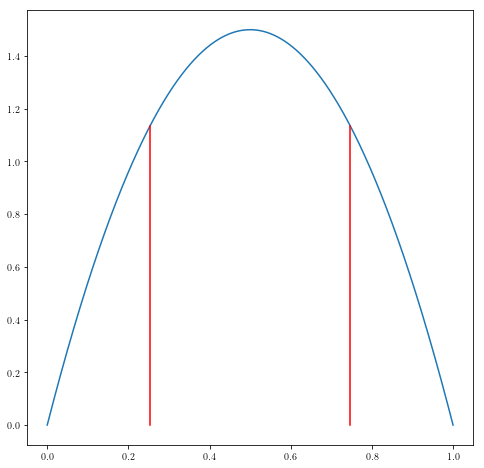

In [500]:
figure = plt.figure(figsize=(8,8))

_X_ = np.linspace(0, 1, 1000)



plt.plot(_X_, normalized(_X_))
plt.plot(_x0_[0]*np.ones(100), np.linspace(0, normalized(_x0_[0]), 100), 'r')
plt.plot(_x0_[1]*np.ones(100), np.linspace(0, normalized(_x0_[1]), 100), 'r')

# Finding the best fit for the line:



In [13]:
_a_ = 1
_b_ = 0

x_data = np.arange(1, 10, 1)
y_data = np.array([_a_*x+_b_+ random.gauss(0, 0.5) for x in x_data])

Text(0.5, 0, 'x')

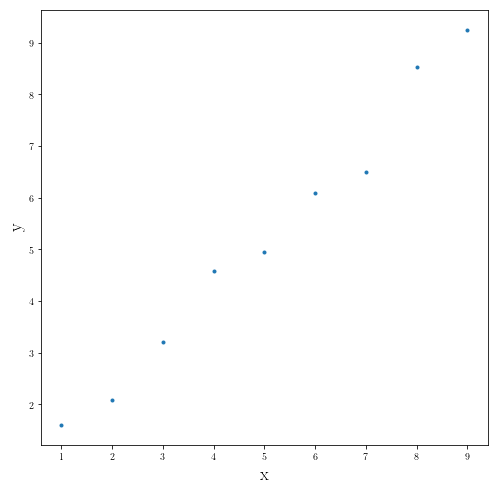

In [14]:
fig = plt.figure(figsize=(8,8))
plt.plot(x_data, y_data, ".")

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


### What is our model?

$$
\begin{equation*}
y = f(x) = \alpha x + \beta
\end{equation*}
$$

In [15]:
num = 100

α_span = np.tan(np.linspace(0, np.pi/2, 100))
β_span = np.linspace(-3, 3, 100)

In [22]:
def least_squared(data, prediction):
    diff = (data-prediction)**2
    return sum(diff)

In [23]:
_matrix_err_ = np.zeros((num, num))

for i in range(num):
    for j in range(num):
        prediction = α_span[i]*x_data+β_span[j]
        _matrix_err_[i][j] = least_squared(y_data, prediction)

In [24]:
ij_min = np.where(_matrix_err_ == _matrix_err_.min())

our_best_estimate = (α_span[ij_min[0]], β_span[ij_min[1]])

In [25]:
our_best_estimate

(array([10.4724738]), array([-3.]))

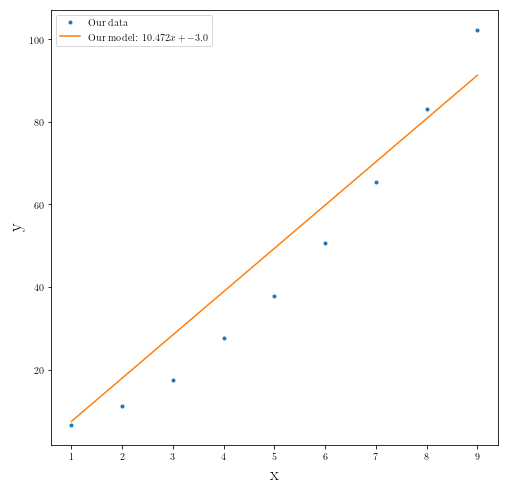

In [26]:
fig2 = plt.figure(figsize=(8,8))

plt.plot(x_data, y_data, ".", label="Our data")
plt.plot(x_data, our_best_estimate[0]*x_data+our_best_estimate[1], 
         label="Our model: ${}x+{}$".format(round(float(our_best_estimate[0]),3),
                                            round(float(our_best_estimate[1]), 3)))

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


plt.legend()
plt.show()

## Let's fit higher degrees!

Fitting model for a data set taken from the second-order polynomial added by a random Gaussian noise: 


In [188]:
_a_ = 1
_b_ = 2
_c_ = 3


x_data = np.arange(1, 10, 1)
y_data = np.array([_a_*x**2+_b_*x+_c_+ random.gauss(0, 0.5) for x in x_data])

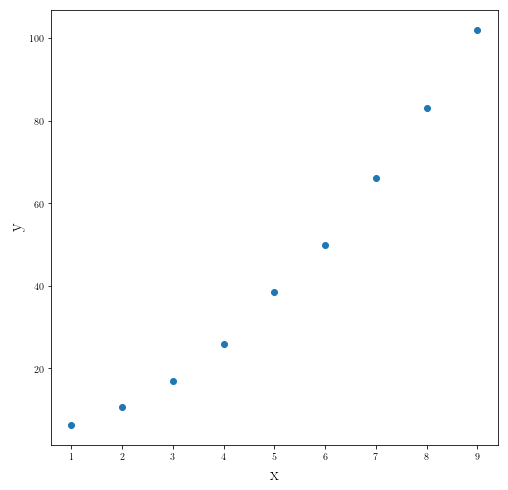

In [190]:
fig = plt.figure(figsize=(8,8))
plt.plot(x_data, y_data, ".", markersize = 12)

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)

plt.show()

### Let's fit the linear model first:

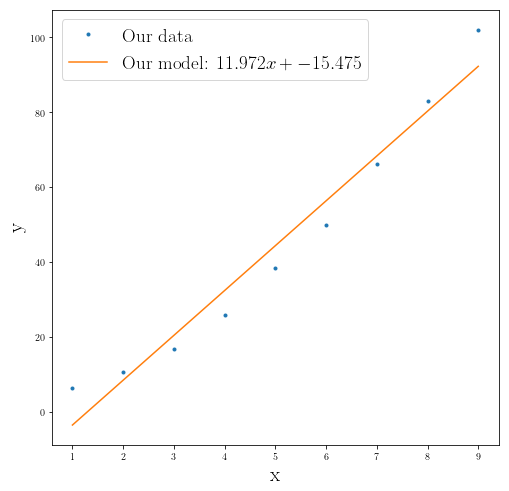

In [192]:
num = 1000

α_span = np.tan(np.linspace(0, np.pi/2, 1000))
β_span = np.linspace(-20, 20, 1000)

_matrix_err_ = np.zeros((num, num))

for i in range(num):
    for j in range(num):
        prediction = α_span[i]*x_data+β_span[j]
        _matrix_err_[i][j] = least_squared(y_data, prediction)
        
        
ij_min = np.where(_matrix_err_ == _matrix_err_.min())

our_best_estimate_linear = (α_span[ij_min[0]], β_span[ij_min[1]])

########
fig2 = plt.figure(figsize=(8,8))

plt.plot(x_data, y_data, ".", label="Our data")
plt.plot(x_data, our_best_estimate_linear[0]*x_data+our_best_estimate_linear[1], 
         label="Our model: ${}x+{}$".format(round(float(our_best_estimate_linear[0]),3),
                                            round(float(our_best_estimate_linear[1]), 3)))

plt.ylabel(r"y", fontsize=21)
plt.xlabel(r"x", fontsize=21)


plt.legend(fontsize=19)
plt.show()

### Fitting second order polynomial
Now let's use the exact same grid search algorithm for the second order polynomial

In [30]:
num = 100

α_span = np.linspace(0, 3, num)
β_span = np.linspace(-3, 3, num)
γ_span = np.linspace(0, 5, num)

_matrix_err_ = np.zeros((num, num, num))

for i in range(num):
    for j in range(num):
        for k in range(num):
            prediction = α_span[i]*x_data**2 + β_span[j]*x_data + γ_span[k]
            _matrix_err_[i][j][k] = least_squared(y_data, prediction)
        
        
ijk_min = np.where(_matrix_err_ == _matrix_err_.min())

our_best_estimate = (α_span[ijk_min[0]], β_span[ijk_min[1]], γ_span[ijk_min[2]])


In [31]:
our_best_estimate

(array([1.]), array([2.03030303]), array([2.97979798]))

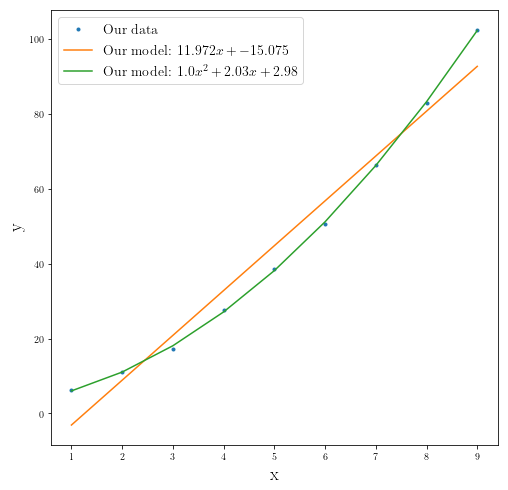

In [32]:
fig2 = plt.figure(figsize=(8,8))

plt.plot(x_data, y_data, ".", label="Our data")

plt.plot(x_data, our_best_estimate_linear[0]*x_data+our_best_estimate_linear[1], 
         label="Our model: ${}x+{}$".format(round(float(our_best_estimate_linear[0]),3),
                                            round(float(our_best_estimate_linear[1]), 3)))

plt.plot(x_data, our_best_estimate[0]*x_data**2+our_best_estimate[1]*x_data+our_best_estimate[2], 
         label="Our model: ${}x^2+{}x+{}$".format(round(float(our_best_estimate[0]),3),
                                            round(float(our_best_estimate[1]), 3),
                                            round(float(our_best_estimate[2]), 3)))

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


plt.legend(fontsize=14)
plt.show()

### Using `numpy.polyfit(x, y, deg)` built-in function: 

In [33]:
np.polyfit(x_data, y_data, deg=1)

array([ 12.02979301, -15.36805287])

In [34]:
np.polyfit(x_data, y_data, deg=2)

array([1.01031624, 1.92663061, 3.15441153])

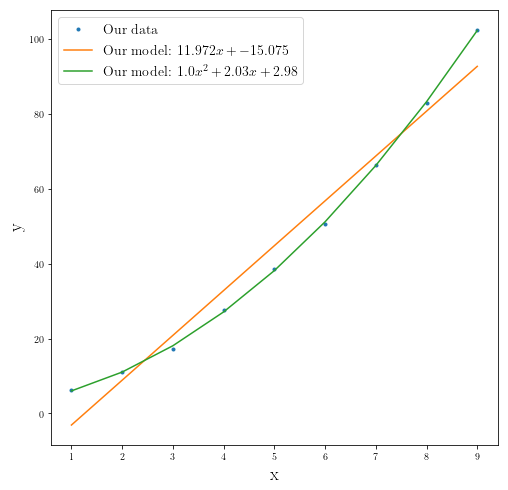

In [35]:
fig2 = plt.figure(figsize=(8,8))

plt.plot(x_data, y_data, ".", label="Our data")

plt.plot(x_data, our_best_estimate_linear[0]*x_data+our_best_estimate_linear[1], 
         label="Our model: ${}x+{}$".format(round(float(our_best_estimate_linear[0]),3),
                                            round(float(our_best_estimate_linear[1]), 3)))

plt.plot(x_data, our_best_estimate[0]*x_data**2+our_best_estimate[1]*x_data+our_best_estimate[2], 
         label="Our model: ${}x^2+{}x+{}$".format(round(float(our_best_estimate[0]),3),
                                            round(float(our_best_estimate[1]), 3),
                                            round(float(our_best_estimate[2]), 3)))

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


plt.legend(fontsize=14)
plt.show()

#### Let's find a measure which accounts for how much of the **variablity of the measured data** has been included in our **model**. 

This is called **coefficient of determination**:

$$
\begin{equation*}
R^2 = 1 -\frac{\sum_i(y_i - p_i)^2}{\sum_i(y_i - \mu)^2}
\end{equation*}
$$

In which $\{y_i\}$ are the measured values, $\{p_i\}$ are the predicted values from our model and $\mu$ is mean of measured values.


Let's turn the above formula into a code:

In [81]:
def R_squared(measured, prediction, mean_squared=False):
    """
    R^2 function:
    
    What portion of the variablitiy in the data is captured
    you are using is accurately predicting the observed data.
    
    BEWRARE: 
            This is not a measure for being the true model
            since you can always get a polynomial of order n
            to fit your n data point perfectly no matter the 
            value of the data points. 
            
            So you should beware of overfitting data by adding
            unneccessary parameters into our model.
            
    INPUT:
            * measured (list, numpy.array): contains emperical data
            * prediction (list, numpy.array): contains prediction 
            from your model.
    
    OUTPUT:
            * R (float) = 1-(sum (measured-prediction)^2)/
                              (sum (measured-mean_measured)^2)
                              
            * mean_error (float): Mean of the errors
            * standard deviation (float) within the measured values  
    """
    error = sum((np.array(measured)-np.array(prediction))**2)
    std = sum((np.array(measured)-np.mean(measured))**2)
    mean_error = error/len(measured)
    
    if mean_squared:
        return 1 - error/std, mean_error, std/len(measured)
    else:
        return 1 - error/std

### A general fitting function using `scipy`:

We are going to pass the values for which we want to fit and a list of degrees of the polynomials you want to fit. And it will return an array of the coefficients sorted by the highest order. And we are going to plot the result for several degrees.


In [193]:
def general_fit(_x_values, _y_values, list_of_degrees=[1]):
    model=[]
    for degree in list_of_degrees:
        fit = np.polyfit(_x_values, _y_values, deg=degree)
        model.append(fit)
    return model


def plot_fits_data(x_values, y_values, list_of_degrees=[1]):
    fitting_parameters = general_fit(x_values, y_values, list_of_degrees)
    x_span = np.linspace(min(x_values), 1.1*max(x_values), 100)
    
    i= 0
    
    plt.plot(x_values, y_values, '.', label="Data ")
    
    for fit_par in fitting_parameters:
        reg = R_squared(y_values, np.polyval(fit_par, x_values))
        reg = round(reg, 3)

        y = np.polyval(fit_par, x_span)
        
        try:
            plt.plot(x_span, y, label="Degree {}: $R^2={}$".format(list_of_degrees[i],reg))
        except IndexError:
            break
        i+=1
    plt.legend(fontsize=14)

In [194]:
_x_, _y_=[0, 1, 2, 3, 4], [1, 2.2, 19, 34.33, 40.1]

/home/abtin/Documents/my_virt_envs/phys_py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


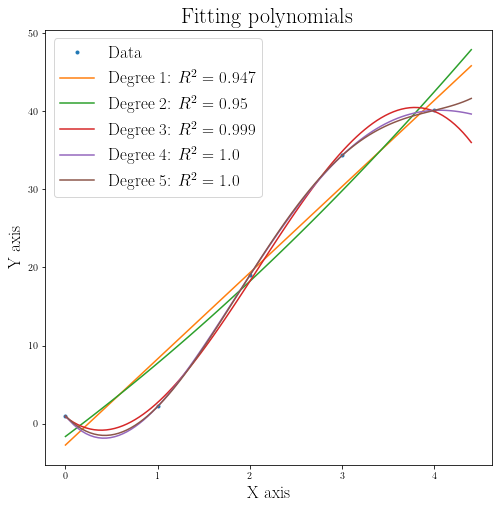

In [195]:
fig = plt.figure(figsize=(8,8))

plot_fits_data(_x_, _y_, [1,2,3,4,5])


plt.title(r"Fitting polynomials", fontsize=22)
plt.legend(fontsize=17)
plt.xlabel(r"X axis", fontsize=17)
plt.ylabel(r"Y axis", fontsize=17)

plt.show()

As you can see by adding more parameters to our paramater space our fit gets better and better in including variablity in our data. 

However, this **does not** mean that we have a better model. For seeing why, just imagine any given set of data points $\{(x,y)\}$. ($n+1$ data points) My argument is that I can solve for the coefficient of the following polynomial (given our data) which will force the polynomial to go through all of the given data points, in other words it has $R^2=1$:

$$
\begin{equation*}
y = P(x) = a_n x^n + a_{n-1}x^{n-1}+...+a_1 x + a_0
\end{equation*}
$$

If you put your data points $(n+1)$ inside this polynomial you can have $n$ independent parameters for the set of $n$ linear equations which can be solved. So there is a solution for the best fitting parameters.

For example for 3 data points we have: $\{(0,0),(1,2), (2,3)\}$

If my previous statement is valid I should be able to fit a "perfect" model with $n=2$ polynomial: 

$$
\begin{equation*}
y = P(x) = a_2 x^2+a_1 x + a_0 
\end{equation*}
$$

So we can form these set by inputing our data:

$$
\begin{equation*}
\begin{array}{lcl}
& a_0  = 0 \\ & a_1 + a_2 = 2 \\ &  4 a_2 + 2 a_1= 3
\end{array}
\end{equation*}
$$

Which leads to:


$$
\begin{equation*}
\begin{array}{lcl}
& a_0  = 0 \\ &  a_1= \frac{5}{2} \\ & a_2 = -\frac{1}{2}  
\end{array}
\end{equation*}
$$


So the following polynomial is going to be the "perfect" fit. But you can guess something is not right. Since we are adding extra complexity to our models which is not neccessarily gives us the right direction to go for finding the **"true"** underlying model which can be quite simple and because of the random errors we see more data variablity. So there is this trade off which you should consider whenever you add more complexity and this case increasing the degree of polynomials to better fit the data.


This is our model function that perfectly predict the given values:
$$
\begin{equation*}
y = -\frac{1}{2} x^2 + \frac{5}{2} x
\end{equation*}
$$

In [186]:
def g(x): return 5/2*x -1/2 *x**2

In [187]:
print((0, g(0)),(1, g(1)), (2, g(2)))

(0, 0.0) (1, 2.0) (2, 3.0)
